#Importing Dataset:

In [1]:
import pandas as pd
!pip install dash
import numpy as np;np.random.seed(42)
import seaborn as sb
import matplotlib.pyplot as plt
!pip install plotly
import plotly
import dash
from dash import html,dcc
from dash.dependencies import Input,Output
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


#Generating Dataset:

In [2]:
customer_id = range(1001, 1501)
age = np.random.randint(18, 65, 500)
gender = np.random.choice(['Male', 'Female'], 500)
marital_status = np.random.choice(['Single', 'Married', 'Divorced'], 500)
annual_income = np.random.randint(30000, 100000, 500)
total_purchase = np.random.randint(5, 50,500)
preferred_category = np.random.choice(['Electronics', 'Appliances', 'Beauty', 'Fashion'], 500)

In [3]:
file = pd.DataFrame({'CUSTOMER_ID': customer_id,'ANNUAL_INCOME (USD)': annual_income,'ANNUAL_INCOME (USD)': annual_income,
    'MARITAL_STATUS': marital_status,
    'TOTAL_PURCAHSE': total_purchase,
    'GENDER': gender,
    'PREFERRED_CATEGORY': preferred_category,
     'AGE': age
})

#Saving Dataset:

In [4]:
file.to_csv('TechElectro_Customer_Data.csv', index=False)


#Importing Dataset:

In [5]:
file=pd.read_csv("TechElectro_Customer_Data.csv")
file.head()

,CUSTOMER_ID,ANNUAL_INCOME (USD),MARITAL_STATUS,TOTAL_PURCAHSE,GENDER,PREFERRED_CATEGORY,AGE
0,1001,86133,Single,32,Male,Electronics,56
1,1002,91268,Married,19,Male,Appliances,46
2,1003,68243,Divorced,10,Male,Beauty,32
3,1004,87384,Married,48,Male,Appliances,60
4,1005,61653,Divorced,24,Male,Fashion,25


#EDA:

In [6]:
file.columns

Index(['CUSTOMER_ID', 'ANNUAL_INCOME (USD)', 'MARITAL_STATUS',
       'TOTAL_PURCAHSE', 'GENDER', 'PREFERRED_CATEGORY', 'AGE'],
      dtype='object')

In [7]:
file.isnull().sum()

CUSTOMER_ID            0
ANNUAL_INCOME (USD)    0
MARITAL_STATUS         0
TOTAL_PURCAHSE         0
GENDER                 0
PREFERRED_CATEGORY     0
AGE                    0
dtype: int64

In [8]:
file.describe()

,CUSTOMER_ID,ANNUAL_INCOME (USD),TOTAL_PURCAHSE,AGE
count,500.000000,500.000000,500.000000,500.000000
mean,1250.500000,65129.962000,26.260000,41.278000
std,144.481833,19309.946461,13.006103,13.389072
min,1001.000000,30060.000000,5.000000,18.000000
25%,1125.750000,50641.750000,15.000000,30.000000
50%,1250.500000,64088.500000,26.000000,42.000000
75%,1375.250000,81202.750000,38.000000,52.000000
max,1500.000000,99768.000000,49.000000,64.000000


In [9]:
file.shape


(500, 7)

In [10]:
pc_counts =file.PREFERRED_CATEGORY.value_counts()
pc_percentage = (pc_counts/ len(file)) * 100
print('Preferred Category Percentage\n',pc_percentage)

Preferred Category Percentage
 Fashion        27.4
Electronics    26.4
Appliances     24.2
Beauty         22.0
Name: PREFERRED_CATEGORY, dtype: float64


#Data Visualization:

#Preferred Category:

#Pie Chart Of Percentages of Preferred Category:

In [11]:
fig_pie_for_percentage_of_pc = px.pie(data_frame=file, names='PREFERRED_CATEGORY', title='Pie Chart:<br>Percentages of Preferred Category:<br>Collectively People Prefer Fashion Category Of Your Company',hole=0.10,template='plotly_dark')
fig_pie_for_percentage_of_pc.update_layout(title_font=dict(size=15,family="Arial",color='Cyan'))
fig_pie_for_percentage_of_pc.show()

#Histogram of Preferred Category:

In [12]:
hist_of_pc = px.bar(data_frame=file, x='PREFERRED_CATEGORY', color='PREFERRED_CATEGORY',
             template='plotly_dark',title='Distribution of Gender on the basis of Category',
             labels={'PREFERRED_CATEGORY': 'PREFERRED_CATEGORY', 'count': 'COUNT'})
hist_of_pc.update_layout(title_font=dict(size=15,color="Cyan"))
hist_of_pc.show()

#Scatter plot of Preferred Category:

In [13]:
category_codes = {'Electronics':1,'Appliances':2,'Beauty':3,'Fashion':4}
file['Category_Code'] = file['PREFERRED_CATEGORY'].map(category_codes)
fig_scatter_category = px.scatter(data_frame=file, x='PREFERRED_CATEGORY', y='Category_Code',color='PREFERRED_CATEGORY',size='AGE',title='Scatter Plot: Preferred Category',labels={'ANNUAL_INCOME (USD)': 'Annual Income (USD)',
                                          'TOTAL_PURCHASE': 'Total Purchase'})
fig_scatter_category.show()

#Percentages of Ages:

#Pie Chart OF Age:

In [14]:
age_counts =file.AGE.value_counts().nlargest(10)
age_percentage = (age_counts/ len(file)) * 100
top_ten_age_percentage=age_percentage
data_frame_for_top_ten_ages=pd.DataFrame({'AGES':top_ten_age_percentage.index,"PERCENTAGES":top_ten_age_percentage.values})
fig_pie_for_percentage_of_age = px.pie(data_frame=data_frame_for_top_ten_ages, names='AGES',values='PERCENTAGES', title='Percentages of Age:<br>The People of Age 50 visits the most.',hole=0.10,template='plotly_dark')
fig_pie_for_percentage_of_age.update_layout(title_font=dict(size=15,family="Arial",color='Cyan'))
fig_pie_for_percentage_of_age.show()


#Histogram Of Age :

In [15]:
hist_of_age= px.bar(data_frame=data_frame_for_top_ten_ages, x='PERCENTAGES', color='AGES',
             template='plotly_dark',title='Histogram OF Age Percentages',
             labels={'GENDER': 'GENDER--->', 'PREFERRED_CATEGORY': 'PREFERRED_CATEGORY', 'count': 'COUNT--->'})
hist_of_age.update_layout(title_font=dict(size=15,color="Cyan"))
hist_of_age.show()

#Scatter plot of Age Perentage:

In [16]:
scatter_plot_age=px.scatter(data_frame=data_frame_for_top_ten_ages,x='PERCENTAGES',y='AGES',size='AGES',color='AGES',template='plotly_dark',title='Scatter Plot of Age Percentages')
scatter_plot_age.update_layout(title_font=dict(size=15,color="Cyan"))
scatter_plot_age.show()

#Distribution by Gender on the basis of Category:

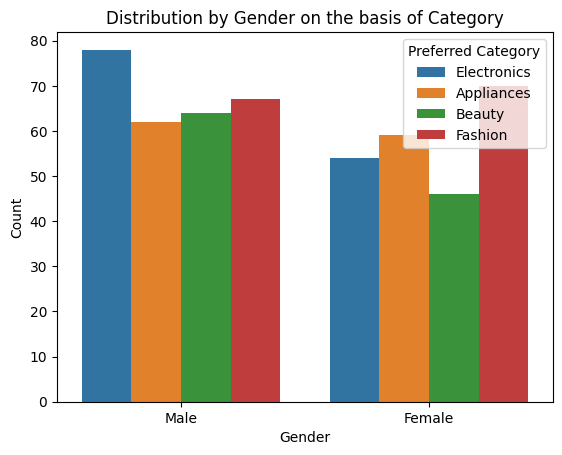

In [17]:
sb.countplot(data=file, x='GENDER', hue='PREFERRED_CATEGORY')
plt.title('Distribution by Gender on the basis of Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Preferred Category', loc='upper right', labels=['Electronics', 'Appliances','Beauty','Fashion'])
plt.show()


In [18]:
gender_dist_basis_of_category = px.bar(data_frame=file, x='GENDER', color='PREFERRED_CATEGORY',
             template='plotly_dark',title='Distribution of Gender on the basis of Category',
             labels={'GENDER': 'GENDER--->', 'PREFERRED_CATEGORY': 'PREFERRED_CATEGORY', 'count': 'COUNT--->'})
gender_dist_basis_of_category.update_layout(title_font=dict(size=15,color="Cyan"))
gender_dist_basis_of_category.show()


#Scatter Plot of Gender With Category:

In [19]:
data=file.groupby("GENDER")['PREFERRED_CATEGORY'].size()

fig_scatter_category = px.scatter(data_frame=file, x='PREFERRED_CATEGORY', y='Category_Code',color='PREFERRED_CATEGORY',size='AGE',title='Scatter Plot: Preferred Category',labels={'ANNUAL_INCOME (USD)': 'Annual Income (USD)',
                                          'TOTAL_PURCHASE': 'Total Purchase'})
fig_scatter_category.show()

#TOTAL_PURCHASE & ANNUAL_INCOME:

Scatter Plot:

In [20]:
scatter_plot_btw_TP_and_AI= px.scatter(data_frame=file, x='ANNUAL_INCOME (USD)', y='TOTAL_PURCAHSE', color='PREFERRED_CATEGORY',
                         hover_name='CUSTOMER_ID',size='AGE', title='Total Purchase vs. Annual Income<br>49 items of 100k worth are purchased by the customers<br>The Beauty category of Tech Electro is the most purchased by customers.',
                        template='plotly_dark')
scatter_plot_btw_TP_and_AI.update_layout(title_font=dict(size=15,color="cyan"))
scatter_plot_btw_TP_and_AI.show()

#Box Plot:

In [21]:
box_plot_btw_TP_and_AI= px.box(data_frame=file, x='ANNUAL_INCOME (USD)', y='TOTAL_PURCAHSE', color='PREFERRED_CATEGORY',title='Total Purchase vs. Annual Income')
box_plot_btw_TP_and_AI.update_layout(title_font=dict(size=15,color="cyan"))
box_plot_btw_TP_and_AI.show()

#TOTAL PURCHASE & PREFERRED CATEGORY:

Box Plot:

In [22]:
fig_box = px.box(data_frame=file, x='PREFERRED_CATEGORY', y='TOTAL_PURCAHSE', title='Total Purchase by Preferred Category',
                 labels={'TOTAL_PURCHASE': 'Total Purchase', 'PREFERRED_CATEGORY': 'Preferred Category'})
fig_box.show()

#K-Means Clustering:

In [23]:
data=file.select_dtypes(include=[int])
data

,CUSTOMER_ID,ANNUAL_INCOME (USD),TOTAL_PURCAHSE,AGE,Category_Code
0,1001,86133,32,56,1
1,1002,91268,19,46,2
2,1003,68243,10,32,3
3,1004,87384,48,60,2
4,1005,61653,24,25,4
...,...,...,...,...,...
495,1496,85204,6,37,4
496,1497,81886,31,41,1
497,1498,45563,25,29,4
498,1499,39847,42,52,1


In [24]:
scaled_data=StandardScaler().fit_transform(data)
scaled_data

array([[-1.72859016,  1.08876908,  0.44177326,  1.10065463, -1.30610681],
       [-1.72166195,  1.35496053, -0.55875852,  0.35302888, -0.43768473],
       [-1.71473373,  0.16137568, -1.25143437, -0.69364717,  0.43073735],
       ...,
       [ 1.71473373, -1.01432484, -0.09697462, -0.91793489,  1.29915944],
       [ 1.72166195, -1.31063455,  1.2114131 ,  0.80160433, -1.30610681],
       [ 1.72859016, -0.46524989, -0.55875852,  0.65207918, -0.43768473]])

Elbow Method:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

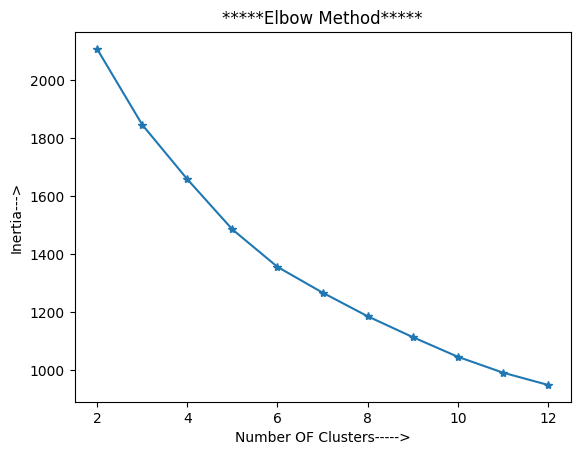

In [25]:

inertia=[]
for i in range(2,13):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)
plt.plot(list(range(2,13)),inertia,marker='*')
plt.xlabel("Number OF Clusters----->")
plt.ylabel("Inertia--->")
plt.title("*****Elbow Method*****")
plt.show()

In [26]:
number_of_cluster=4
kmeans=KMeans(n_clusters=4)
data["Cluster Number"]=kmeans.fit_predict(scaled_data)
data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,CUSTOMER_ID,ANNUAL_INCOME (USD),TOTAL_PURCAHSE,AGE,Category_Code,Cluster Number
0,1001,86133,32,56,1,3
1,1002,91268,19,46,2,3
2,1003,68243,10,32,3,3
3,1004,87384,48,60,2,3
4,1005,61653,24,25,4,1
...,...,...,...,...,...,...
495,1496,85204,6,37,4,0
496,1497,81886,31,41,1,2
497,1498,45563,25,29,4,0
498,1499,39847,42,52,1,2


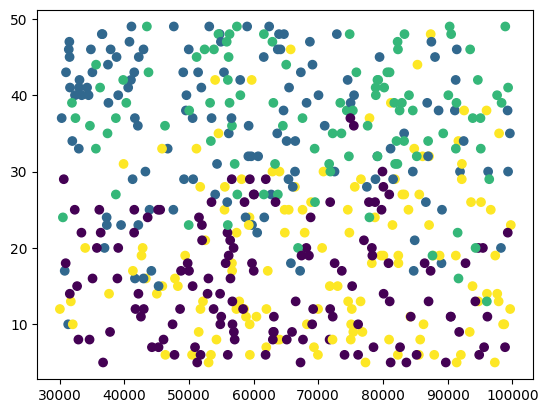

In [27]:
plt.scatter(file['ANNUAL_INCOME (USD)'],file.TOTAL_PURCAHSE, c=data['Cluster Number'], cmap='viridis')
plt.show()

In [28]:
color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple'}
fig = go.Figure()
for cluster_number,color_name in color_map.items():
    cluster_data = data[data['Cluster Number'] == cluster_number]
    fig.add_trace(go.Scatter(x=cluster_data['ANNUAL_INCOME (USD)'],y=cluster_data['TOTAL_PURCAHSE'],mode='markers'))
fig.update_layout(title='Customer Segmentation',template='plotly_dark',xaxis_title='Annual Income (USD)--->',yaxis_title='Total Purchase--->')
fig.show()

#Creating DashBoard:

In [29]:
App = dash.Dash(__name__)
App.layout = html.Div([html.H1("INTERACTIVE DASHBOARD"),html.P("SELECT COLUMNS FOR VISUALIZATION:"),
    dcc.Dropdown(id='Plot-Type',
        options=[
            {'label': 'Scatter Plot', 'value': 'Scatter Plot'},
            {'label': 'Pie Chart', 'value': 'Pie Chart'},
            {'label': 'Bar Chart', 'value': 'Bar Chart'},
            {'label': 'K-MEAN CLUSTERING BETWEEN ANNUAL INCOME(USD) AND TOTAL PURCHASE ONLY', 'value': 'K-Means'},
            {'label': 'Box Plot', 'value': 'Box Plot'}
        ],value='Scatter Plot'),
    dcc.Dropdown(id='column_x',options=[{'label': col, 'value': col} for col in file.columns],value='ANNUAL_INCOME (USD)',),
    dcc.Dropdown(id='column_y',options=[{'label': col, 'value': col} for col in file.columns],value='TOTAL_PURCAHSE',),
    dcc.Graph(id='DATA_VISUALIZATION')])
@App.callback(
    Output('DATA_VISUALIZATION', 'figure'),[Input('Plot-Type', 'value'),Input('column_x', 'value'),Input('column_y', 'value')]
)
def UPDATE_PLOT(selected_plot, column_x, column_y):
    if selected_plot == 'Scatter Plot':
        plot = px.scatter(data_frame=file, x=column_x, y=column_y, color='PREFERRED_CATEGORY',size='AGE', hover_data=['CUSTOMER_ID', 'PREFERRED_CATEGORY'],
                          title=f'Scatter Plot: {column_x} vs {column_y}')
        plot.update_layout(title_font=dict(size=15, color="cyan"), template="plotly_dark")
    elif selected_plot == 'Pie Chart':
        plot = px.pie(data_frame=file, names=column_x, values=column_y,title=f'Pie Chart: {column_y} and {column_x}')
        plot.update_layout(title_font=dict(size=15, color="cyan"), template='plotly_dark')
    elif selected_plot == 'K-Means':
        scaled_data = StandardScaler().fit_transform(file.select_dtypes(include=['int']))
        kmeans = KMeans(n_clusters=4, random_state=42)  # based on elbow method.
        file['Cluster Number'] = kmeans.fit_predict(scaled_data)
        color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple'}
        plot = go.Figure()
        for cluster_number, color_name in color_map.items():
            cluster_data = file[file['Cluster Number'] == cluster_number]
            plot.add_trace(go.Scatter(x=cluster_data['ANNUAL_INCOME (USD)'],y=cluster_data['TOTAL_PURCAHSE'],mode='markers',marker=dict(color=color_name)))
        plot.update_layout(title='CUSTOMER SEGMENTATION',template='plotly_dark',xaxis_title='Annual Income (USD)--->',yaxis_title='Total Purchase--->')
    elif selected_plot == 'Box Plot':
        plot = px.box(data_frame=file, x=column_x, y=column_y, title=f'Box Plot Between {column_x} and {column_y}')
        plot.update_layout(title_font=dict(size=15, color="cyan"), template='plotly_dark')
    else:
        plot = px.bar(data_frame=file, x=column_x, y=column_y, color='GENDER',title=f'Bar Chart: {column_y} and {column_x}')
        plot.update_layout(title_font=dict(size=15, color="cyan"), template='plotly_dark')
    return plot

In [30]:
if __name__ == '__main__':
    App.run_server(debug=True)


<IPython.core.display.Javascript object>